# **CaseStudy 02 : Google Stock Data Analysis** [![Static Badge](https://img.shields.io/badge/Open%20in%20Colab%20-%20orange?style=plastic&logo=googlecolab&labelColor=grey)](https://colab.research.google.com/github/sshrizvi/DS-Python/blob/main/Pandas/CaseStudies/TimeSeriesAnalysis/Notebooks/google_stock_data_analysis.ipynb)

|🔴 **NOTE** 🔴|
|:-----------:|
|This notebook contains the practical implementations of the analysis planned in the article.|
| Here is Article 121 - [Time Series Analysis on Google Stock Data](../Articles/121_casestudy02_time_series_analysis.md) |

### 📦 **Importing Relevant Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ⚠️ **Data Warning**
For the code ahead we are going to use the Google Stock Data which is in the [Data](../Data/) folder or you can download it from the Kaggle.  
Kaggle Data : [Download](https://www.kaggle.com/datasets/umerhaddii/google-stock-data-2024)

In [3]:
google_stock_df = pd.read_csv(
    filepath_or_buffer = '../Data/GoogleStockData2004To2024.csv'
)

### 🌱 **Data Preparation**

#### **1. Converting `dtype` of Date from `object` to `np.datetime64`**

In [4]:
google_stock_df.Date.dtype

dtype('O')

In [5]:
google_stock_df.Date = pd.to_datetime(
    arg = google_stock_df.Date
)

In [6]:
google_stock_df.Date.dtype

dtype('<M8[ns]')

#### **2. Setting `Date` as Index of DataFrame**

In [7]:
google_stock_df.set_index(
    keys = 'Date',
    inplace = True
)

Now, as we have set the `Date` column as Index, we can access data for any date by passing the Date using *loc*.

In [8]:
google_stock_df.loc['2024-06-04']

Open         1.732800e+02
High         1.738500e+02
Low          1.718900e+02
Close        1.737900e+02
Adj Close    1.731623e+02
Volume       2.687960e+07
Name: 2024-06-04 00:00:00, dtype: float64

Similarly, now we can use slicing to access data for a period.

In [9]:
google_stock_df.loc['2022-01-01' : '2022-01-31']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,145.054993,145.850998,143.712997,144.991501,144.467789,28646000
2022-01-04,145.395996,146.485001,143.716507,144.399506,143.877945,28400000
2022-01-05,144.419998,144.499496,137.688004,137.774994,137.277359,54618000
2022-01-06,136.998505,139.940002,136.558502,137.747498,137.249954,37348000
2022-01-07,138.145493,138.448502,135.766495,137.016998,136.522110,29760000
2022-01-10,135.078003,138.819504,133.164505,138.669495,138.168625,44408000
2022-01-11,138.007004,140.216003,136.692505,139.735992,139.231277,28730000
2022-01-12,141.149994,142.608002,140.694504,141.430496,140.919647,26108000
2022-01-13,141.539993,142.850006,138.408997,138.587006,138.086441,31436000


Similarly, we can now do partial indexing as we have converted the date into a DatetimeIndex object of Pandas.  
**Partial Indexing :** Partial Indexing means passing partial dates to access data.  
Let's see the examples.

🎯 **Example 01 :** All records of the year 2022.

In [10]:
google_stock_df.loc['2022']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,145.054993,145.850998,143.712997,144.991501,144.467789,28646000
2022-01-04,145.395996,146.485001,143.716507,144.399506,143.877945,28400000
2022-01-05,144.419998,144.499496,137.688004,137.774994,137.277359,54618000
2022-01-06,136.998505,139.940002,136.558502,137.747498,137.249954,37348000
2022-01-07,138.145493,138.448502,135.766495,137.016998,136.522110,29760000
...,...,...,...,...,...,...
2022-12-23,87.110001,89.550003,87.070000,89.230003,88.907707,23003000
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.074348,20097300
2022-12-28,86.980003,88.040001,85.940002,86.019997,85.709297,19523200


#### **3. Creating Month Name, Day Name, and Quarter columns**

In [11]:
google_stock_df['month_name'] = google_stock_df.index.month_name()

In [12]:
google_stock_df['weekday_name'] = google_stock_df.index.day_name()

In [13]:
google_stock_df['Quarter'] = google_stock_df.index.quarter

#### **4. Creating the Daily Stock Return Column**  

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

In [14]:
google_stock_df['DailyReturns'] = (google_stock_df.Close - \
                                   google_stock_df.Close.shift(1)) / \
                                   google_stock_df.Close.shift(1)

#### **5. Creating the Logarithmic Return Column**  

$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1})
$$

In [15]:
google_stock_df['LogReturns'] = np.log(google_stock_df.Close) - np.log(google_stock_df.Close.shift(1))

#### **6. Creating Percentage Change Column**  

$$
\%\text{Change}_t = \left( \frac{P_t - P_{t-1}}{P_{t-1}} \right) \times 100
$$

In [16]:
google_stock_df['PercentageChanges'] = ((google_stock_df.Close - \
                                         google_stock_df.Close.shift(1)) / \
                                         google_stock_df.Close.shift(1)) * 100

#### **7. Creating the Intraday Return Column**  

In [17]:
google_stock_df['IntraDayReturn'] = (google_stock_df['Close'] - google_stock_df['Open']) / google_stock_df['Open']

#### **8. Performing Data Vaidation Check**  

As we know that if the data is accurate, then it will follow the following conditions.

$$
High \geq Close \geq Low, \\
High \geq Open \geq Low, \\
Low \leq High
$$

Lets Validate our data for these conditions.

In [18]:
((google_stock_df['High'] >= google_stock_df['Close']) & \
(google_stock_df['Close'] >= google_stock_df['Low'])).sum() - google_stock_df.shape[0]

0

In [19]:
((google_stock_df['High'] >= google_stock_df['Open']) & \
(google_stock_df['Open'] >= google_stock_df['Low'])).sum() - google_stock_df.shape[0]

0

In [20]:
(google_stock_df['Low'] <= google_stock_df['High']).sum() - google_stock_df.shape[0]

0

**Conclusion :** The given Stock Data does not contain any ambiguity. All the Validation Check is passed.

### 🧐 **Data Analysis**

Let's try to fetch data of stock for a particular date for every year.  
**For Example :** On the Indian Independence Day.

In [21]:
google_stock_df[
    google_stock_df.index.isin(
        values = pd.date_range(
            start = '2005-08-15',
            end = '2024-08-15',
            freq = pd.DateOffset(
                years = 1
            )
        )
    )
]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,Quarter,DailyReturns,LogReturns,PercentageChanges,IntraDayReturn
Date,,,,,,,,,,,,,
2005-08-15,7.252252,7.326577,7.101351,7.107107,7.081437,326661012,August,Monday,3,-0.019743,-0.019941,-1.974314,-0.020014
2006-08-15,9.362112,9.551301,9.324324,9.533784,9.499349,267660072,August,Tuesday,3,0.031237,0.030759,3.123731,0.018337
2007-08-15,12.737738,12.805055,12.430180,12.451201,12.406228,216163620,August,Wednesday,3,-0.021726,-0.021966,-2.172630,-0.022495
2008-08-15,12.687437,12.779279,12.650150,12.766517,12.720404,141686172,August,Friday,3,0.009219,0.009177,0.921875,0.006233
2011-08-15,13.849600,14.138889,13.664915,13.944695,13.894327,285510204,August,Monday,3,-0.011600,-0.011668,-1.160042,0.006866
2012-08-15,16.773773,16.873123,16.619120,16.705206,16.644867,96331572,August,Wednesday,3,-0.001675,-0.001676,-0.167491,-0.004088
2013-08-15,21.632633,21.644646,21.471472,21.513014,21.435308,74693232,August,Thursday,3,-0.011669,-0.011738,-1.166919,-0.005530
2014-08-15,29.375000,29.473499,29.038000,29.185499,29.080082,34468000,August,Friday,3,-0.001608,-0.001609,-0.160783,-0.006451
2016-08-15,40.360500,40.568001,40.201500,40.298000,40.152447,18596000,August,Monday,3,-0.001351,-0.001352,-0.135061,-0.001549


Let's plot some visualizations to see the patterns in our stock data.

#### **1. Open Column Visualization**

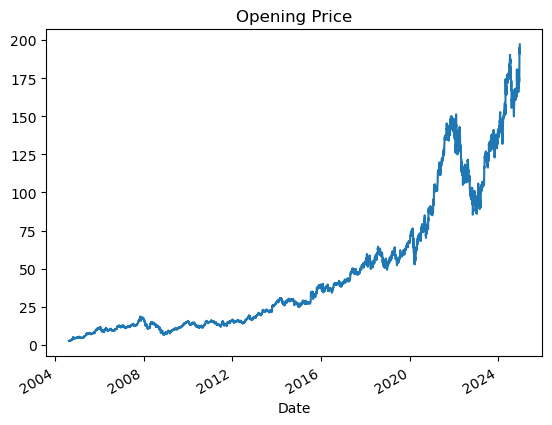

In [22]:
google_stock_df['Open'].plot(
    kind = 'line'
)
plt.title('Opening Price')
plt.show()

#### **2. Close Column Visualization**

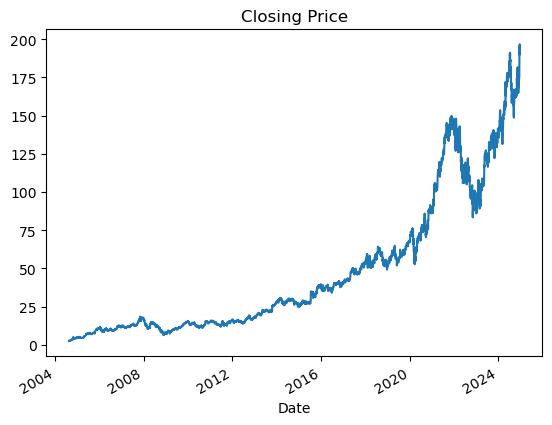

In [23]:
google_stock_df['Close'].plot(
    kind = 'line'
)
plt.title('Closing Price')
plt.show()

#### **3. High Column Visualization**

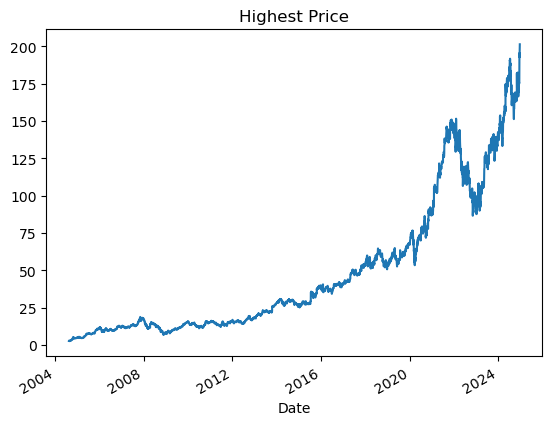

In [24]:
google_stock_df['High'].plot(
    kind = 'line'
)
plt.title('Highest Price')
plt.show()

#### **4. Low Column Visualization**

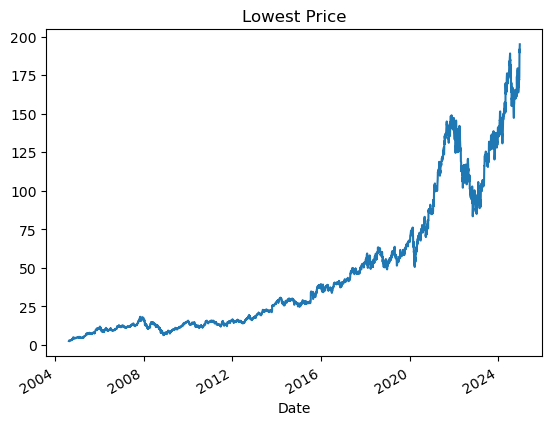

In [25]:
google_stock_df['Low'].plot(
    kind = 'line'
)
plt.title('Lowest Price')
plt.show()

#### **5. Open, Close, Low & High Column Visualization**

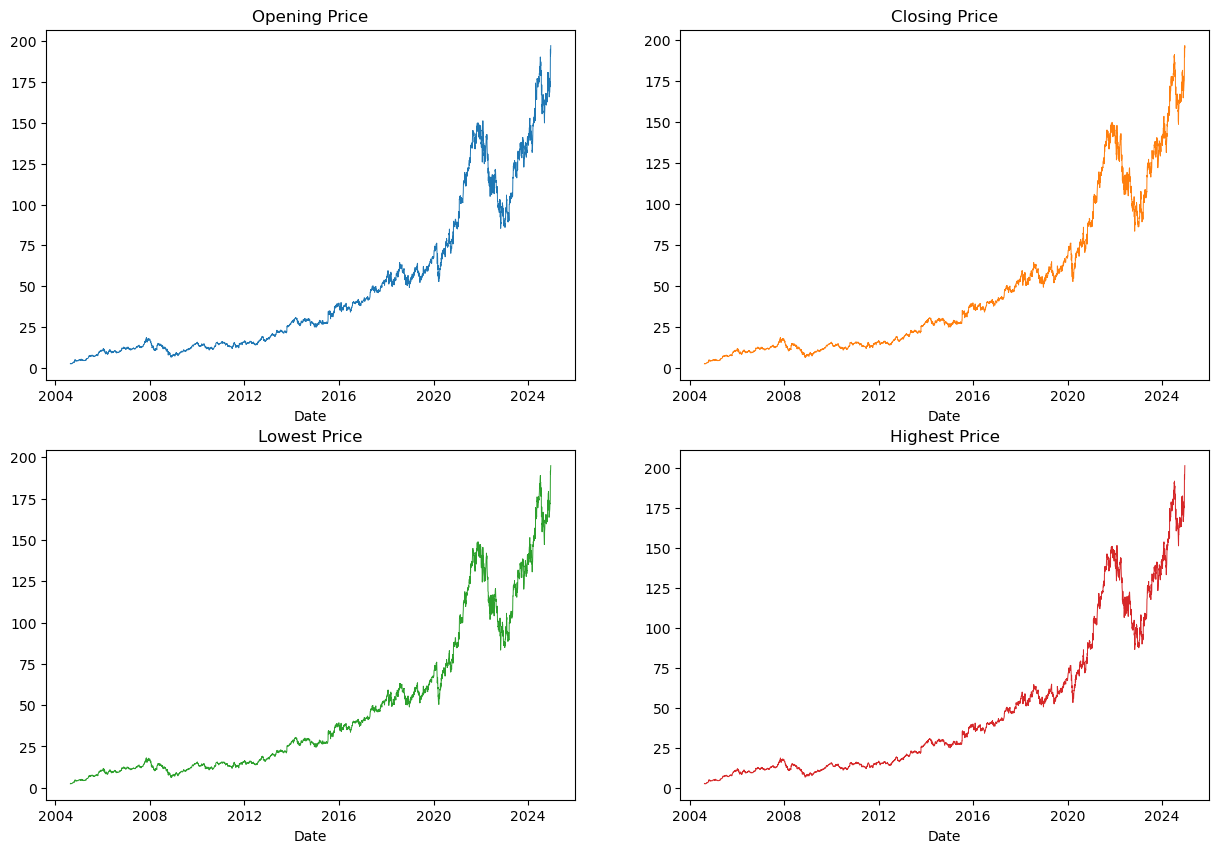

In [26]:
columns_to_plot = ['Open', 'Close', 'Low', 'High']
ax = google_stock_df[columns_to_plot].plot(
    subplots = True,
    layout = (2, 2),
    sharex = False,
    sharey = False,
    linewidth = 0.7,
    fontsize = 10,
    legend = False,
    figsize = (15, 10),
    title = ['Opening Price', 'Closing Price', 'Lowest Price', 'Highest Price']
)

#### **6. Dynamic Quarter Visualization of Any Column**

**Function :** Defining a function to ease the process and a little bit dynamic.

In [27]:
def visualize_quarter_values(
    q: int,
    column: str
):
    desired_df = google_stock_df[column][google_stock_df['Quarter'] == q]
    ax = desired_df.plot(
        kind = 'line',
        title = f'Q{q} Visualization of {column} Column'
    )
    plt.show()
    return

**Sample Function Calls**

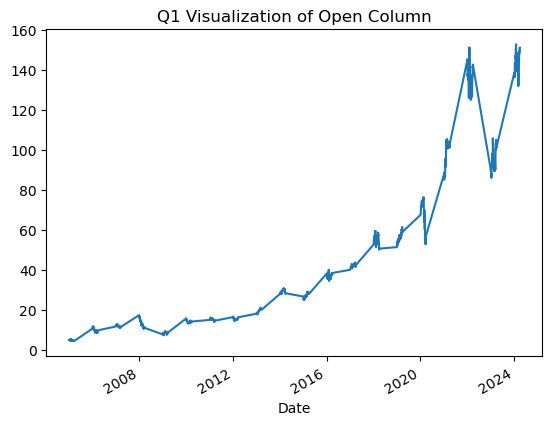

In [28]:
visualize_quarter_values(
    q = 1,
    column = 'Open'
)

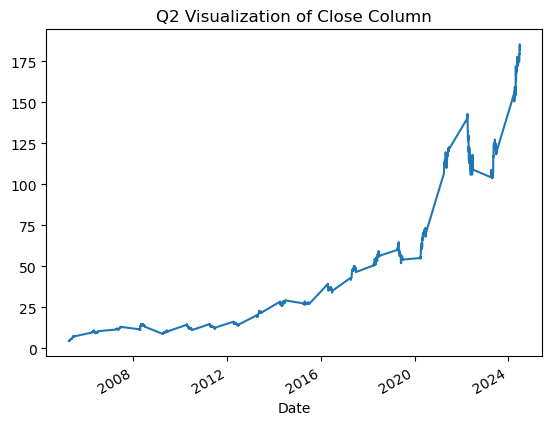

In [29]:
visualize_quarter_values(
    q = 2,
    column = 'Close'
)

#### **7. Dynamic Visualization of Any Column for a Quarter of a particular Year.**

**Function :** Defining a function to ease the process and a little bit dynamic.

In [30]:
def visualize_year_quarter_values(
    q: int,
    year: int,
    column: str
):
    desired_df = google_stock_df[column].loc[str(year)][google_stock_df['Quarter'] == q]
    ax = desired_df.plot(
        kind = 'line',
        title = f'Q{q} Visualization of {column} Column for Year {year}',
        ylabel = 'Stock Price'
    )
    plt.show()
    return

**Sample Function Calls**

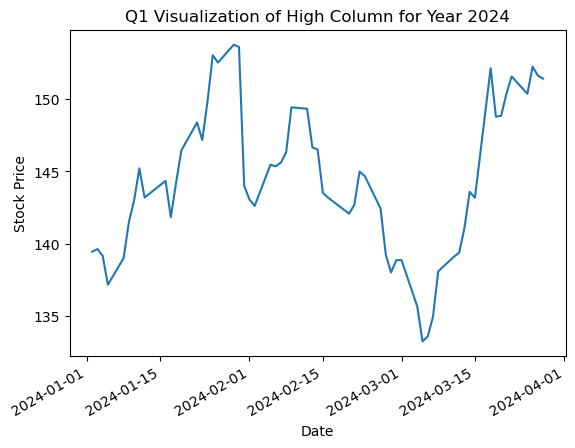

In [31]:
visualize_year_quarter_values(
    q = 1,
    year = 2024,
    column = 'High'
)

#### **8. Summary Statistics of Return Columns**

In [32]:
def display_return_stats(
    df: pd.DataFrame
):
    '''
    Displays the Summary Statistics for all the Return Columns.
    '''
    
    return_columns = ['DailyReturns', 'LogReturns', 'PercentageChanges', 'IntraDayReturn']
    
    return_summary_df = pd.DataFrame(
        columns = return_columns
    )
    
    for col in return_columns:
        summary_stats_dict = {
            'Mean' : df[col].mean(),
            'Std. Dev' : df[col].std(),
            'Min' : df[col].min(),
            'Max' : df[col].max(),
            'Skewness' : df[col].skew(),
            'Kurtosis' : df[col].kurtosis(),
        }
        return_summary_df[col] = pd.Series(summary_stats_dict)
        
    return return_summary_df

In [33]:
display_return_stats(
    df = google_stock_df
)

,DailyReturns,LogReturns,PercentageChanges,IntraDayReturn
Mean,0.001036,0.000851,0.103576,0.000089
Std. Dev,0.019274,0.019176,1.927362,0.014925
Min,-0.116341,-0.123685,-11.634149,-0.091797
Max,0.199915,0.182251,19.991543,0.087598
Skewness,0.617945,0.325015,0.617945,-0.150294
Kurtosis,9.159034,7.940379,9.159034,3.340937


#### **9. Visualizing Return Columns**

In [34]:
def plot_return_analysis(
    df : pd.DataFrame
):
    '''
    Displays Comprehensive Visualizations of Return Columns Analysis.
    '''
    
    fig, axes = plt.subplots(
        nrows = 2,
        ncols = 3,
        sharex = False,
        sharey = False,
        figsize = (18, 12)
    )
    fig.suptitle(
        t = 'Google Stock Returns Analysis',
        fontsize=16,
        fontweight='bold'
    )
    
    # 1. Google Stock Price Evolution
    axes[0,0].set_title('Google Stock Price Evolution')
    axes[0,0].plot(
        df.index,
        df['Close']
    )
    axes[0,0].set_ylabel('Close Price ($)')
    axes[0,0].grid(True, alpha = 0.3)
    
    # 2. Daily Returns Evolution
    axes[0,1].set_title('Daily Return Over Time')
    axes[0,1].plot(
        df.index,
        df['DailyReturns'],
        color = 'orange'
    )
    axes[0,1].set_ylabel('Daily Return')
    axes[0,1].axhline(y = 0, color = 'red', linestyle = '--', alpha = 0.5)
    axes[0,1].grid(True, alpha = 0.3)
    
    # 3. Log Returns Evolution
    axes[0,2].set_title('Log Returns Over Time')
    axes[0,2].plot(
        df.index,
        df['LogReturns'],
        color = 'tomato'
    )
    axes[0,2].axhline(y = 0, color = 'white', linestyle = '--', alpha = 0.5)
    axes[0,2].grid(True, alpha = 0.3)
    
    # 4. Distribution of Daily Returns
    axes[1,0].hist(
        df['DailyReturns'],
        bins = 100,
        alpha = 0.7,
        color = 'green',
        edgecolor = 'black'
    )
    axes[1,0].set_title('Distribution of Daily Returns')
    axes[1,0].set_xlabel('Daily Return')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].axvline(
        x = df['DailyReturns'].mean(),
        color = 'red',
        linestyle = '--', 
        label = f'Mean: {df["DailyReturns"].mean():.4f}')
    axes[1,0].legend()
    
    # 5. Distribution of Log Returns
    axes[1,1].hist(
        df['LogReturns'],
        bins = 100,
        alpha = 0.7,
        color = 'pink',
        edgecolor = 'black'
    )
    axes[1,1].set_title('Distribution of Log Returns')
    axes[1,1].set_xlabel('Log Return')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].axvline(
        x = df['LogReturns'].mean(),
        color = 'red',
        linestyle = '--', 
        label = f'Mean: {df["LogReturns"].mean():.4f}')
    axes[1,1].legend()
    
    # 6. Rolling Volatility (30 Days)
    df['RollingVolatility'] = df['DailyReturns'].rolling(window=30).std() * np.sqrt(252)
    axes[1,2].plot(
        df.index,
        df['RollingVolatility'],
        linewidth = 1,
        color = 'orchid'
    )
    axes[1,2].set_title('30-Day Rolling Volatility (Annualized)')
    axes[1,2].set_xlabel('Date')
    axes[1,2].set_ylabel('Volatility')
    axes[1,2].grid(True, alpha = 0.3)

**Sample Function Call**

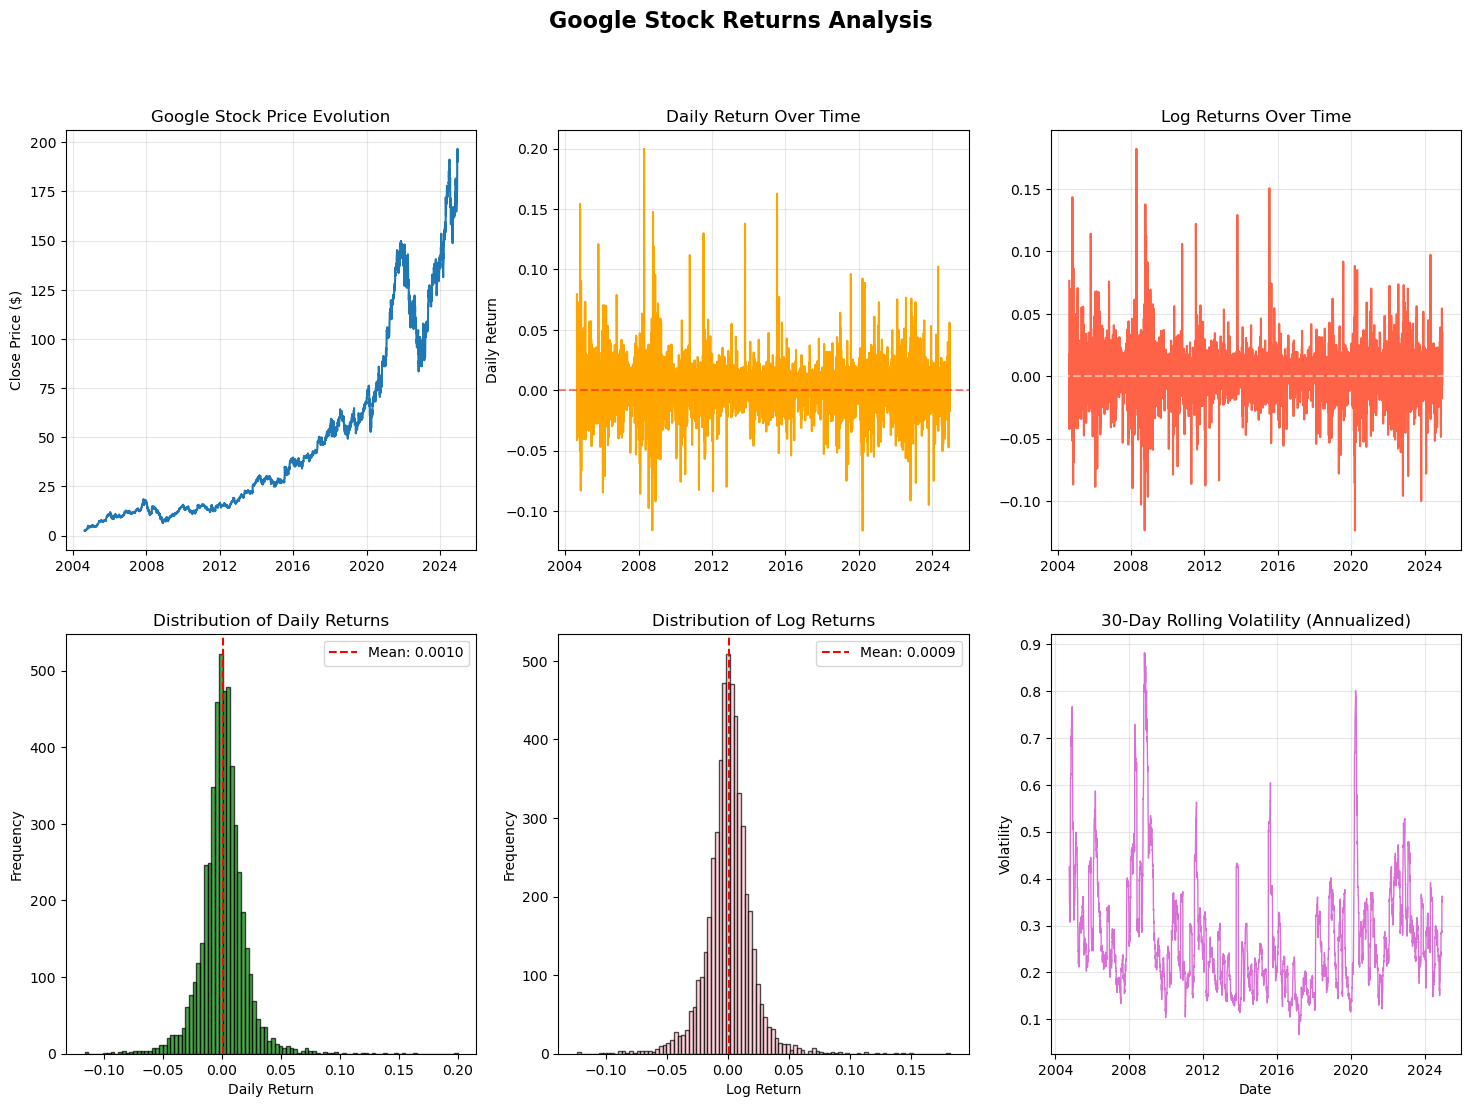

In [35]:
plot_return_analysis(
    df = google_stock_df
)

### 🎲 **Resampling**

Resampling involves changing the frequency of your time series observations.  
Two types of resampling are:  
- **Upsampling :** Where you increase the frequency of the samples, such as from minutes to seconds.  
- **Downsampling :** Where you decrease the frequency of the samples, such as from days to months.  

The Pandas method used to do resampling is [`pd.DataFrame.resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html#pandas-dataframe-resample) or [`pd.Series.resample()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html#pandas-series-resample) method.

#### 👇 **Downsampling**

Keep in mind that when downsampling is done there is need of specifying two things.  
1. freq : It uses the Offset Aliases to determine the frequency.
2. aggregation function : It is used so that the insight of the data do not get lost.

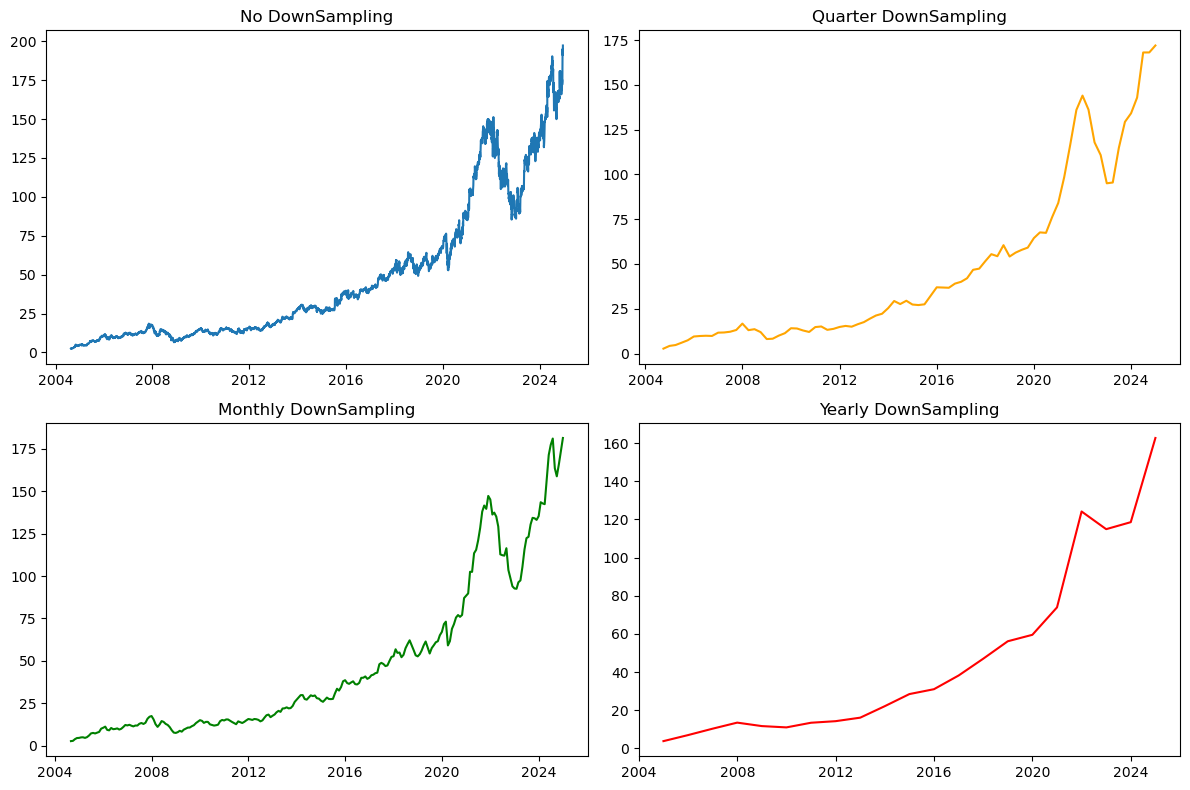

In [ ]:
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 2,
    sharex = False,
    sharey = False,
    figsize = (12, 8)
)

axes = axes.flatten()

axes[0].plot(
    google_stock_df.index,
    google_stock_df['Open']
)
axes[0].set_title('No DownSampling')

axes[1].plot(
    google_stock_df['Open'].resample(
        rule = 'QE',
    ).mean().index,
    google_stock_df['Open'].resample(
        rule = 'QE',
    ).mean(),
    color = 'orange'
)
axes[1].set_title('Quarter DownSampling')

axes[2].plot(
    google_stock_df['Open'].resample(
        rule = 'ME',
    ).mean().index,
    google_stock_df['Open'].resample(
        rule = 'ME',
    ).mean(),
    color = 'green'
)
axes[2].set_title('Monthly DownSampling')

axes[3].plot(
    google_stock_df['Open'].resample(
        rule = 'YE',
    ).mean().index,
    google_stock_df['Open'].resample(
        rule = 'YE',
    ).mean(),
    color = 'red'
)
axes[3].set_title('Yearly DownSampling')


plt.tight_layout()
plt.show()

#### 👆 **Upsampling**  

While performing Upsampling, we need to to keep this in mind.  
- When Upsampling is done, a lot of new Timestamps are created.  
  So, we have to fill those with the help of interpolate function.  
- While using interpolate function for upsampling, we need to choose the suitable method among the available ones.

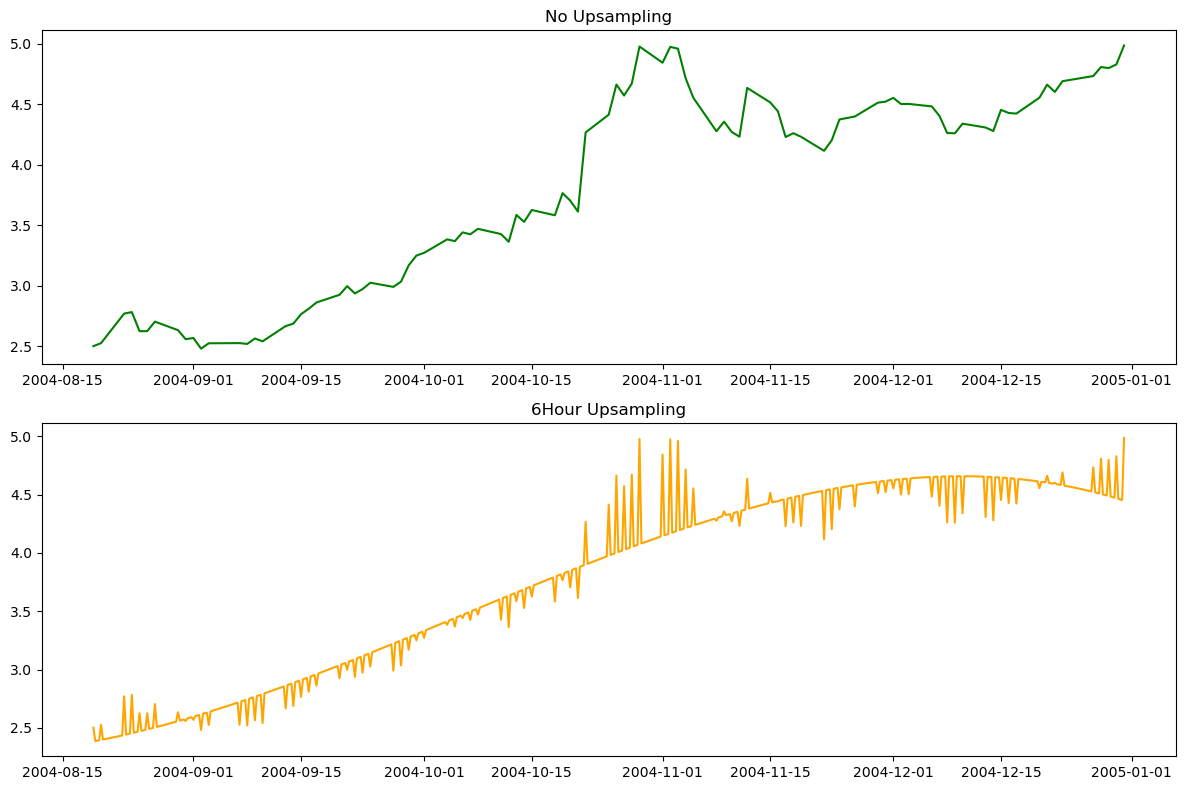

In [ ]:
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 1,
    sharex = False,
    sharey = False,
    figsize = (12, 8)
)

axes = axes.flatten()

axes[0].plot(
    google_stock_df.loc['2004'].index,
    google_stock_df['Open'].loc['2004'],
    color = 'green'   
)
axes[0].set_title('No Upsampling')

axes[1].plot(
    google_stock_df['Open'].loc['2004'].resample(
        rule = '6h'
    ).interpolate(
        method = 'spline',
        order = 3
    ).index,
    google_stock_df['Open'].loc['2004'].resample(
        rule = '6h'
    ).interpolate(
        method = 'spline',
        order = 3
    ),
    color = 'orange'   
)
axes[1].set_title('6Hour Upsampling')

plt.tight_layout()
plt.show()

### 🎲 **Rolling Window (Smoothing)**

Time series data in original format can be quite volatile, especially on smaller aggregation levels.  
The concept of rolling, or moving averages is a useful technique for smoothing time series data. 


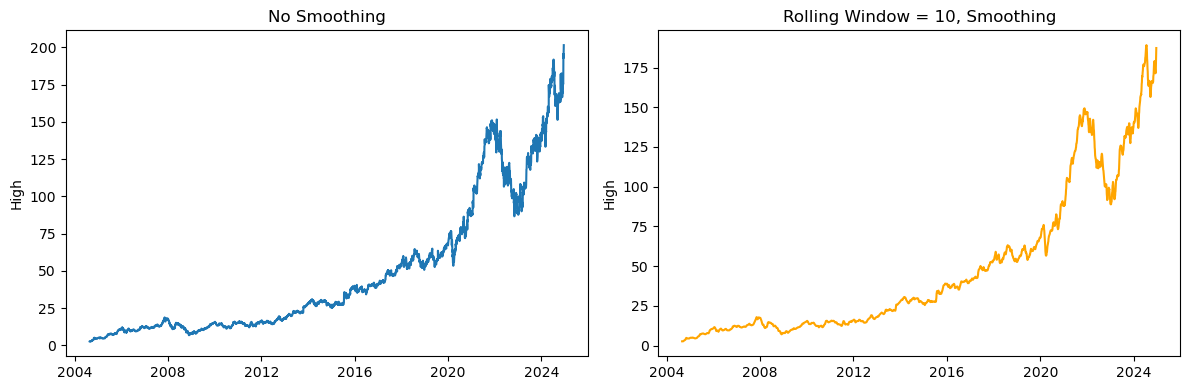

In [ ]:
fig, axis = plt.subplots(
    nrows = 1,
    ncols = 2,
    sharex = False,
    sharey = False,
    figsize = (12, 4)
)

axis = axis.flatten()

axis[0].plot(
    google_stock_df['High'].index,
    google_stock_df['High']
)
axis[0].set_title('No Smoothing')
axis[0].set_ylabel('High')

axis[1].plot(
    google_stock_df['High'].rolling(
        window = 10
    ).mean().index,
    google_stock_df['High'].rolling(
        window = 10
    ).mean(),
    color = 'orange'
)
axis[1].set_title('Rolling Window = 10, Smoothing')
axis[1].set_ylabel('High')

plt.tight_layout()
plt.show()

### 🎲 **Shifting**

The `shift( )` function is Pandas is used to shift the entire series up or down by the desired number of periods. 

See Documentation : [Link](https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html#pandas-series-shift)

In [ ]:
google_stock_df['Open'].shift(
    periods = 3
)

Date
2004-08-19           NaN
2004-08-20           NaN
2004-08-23           NaN
2004-08-24      2.502503
2004-08-25      2.527778
                 ...    
2024-12-11    172.029999
2024-12-12    173.960007
2024-12-13    182.850006
2024-12-16    185.309998
2024-12-17    195.000000
Name: Open, Length: 5118, dtype: float64